In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import json

import missingno as msno

In [91]:
df = pd.read_csv('housePrice.csv')

In [92]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


### Standardize Column Name Format

In [93]:
df.columns = [col.lower() for col in df.columns]

## Check Data Type

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        3479 non-null   object 
 1   room        3479 non-null   int64  
 2   parking     3479 non-null   bool   
 3   warehouse   3479 non-null   bool   
 4   elevator    3479 non-null   bool   
 5   address     3456 non-null   object 
 6   price       3479 non-null   float64
 7   price(usd)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


### 1. **Area** Column

In [95]:
# find not digit values
for value in df['area'].unique():
    if not value.isdigit():
        print(value)
# fix
df['area'] = df['area'].str.replace(',', '')

# change data type
df['area'] = df['area'].astype('float')

# another way 
# df = df[df['Area'].str.isdigit()]
# df['Area'] = df['Area'].astype(float)

 3,310,000,000 
 16,160,000,000 
 1,000 
 8,400,000,000 
 3,600 
 2,550,000,000 


In [96]:
df['area'].dtype

dtype('float64')

### 2. Parking, Warehouse, Elevator

In [97]:
df['parking'] = df['parking'].astype(int)
df['warehouse'] = df['warehouse'].astype(int)
df['elevator'] = df['elevator'].astype(int)

In [98]:
df.dtypes

area          float64
room            int64
parking         int32
warehouse       int32
elevator        int32
address        object
price         float64
price(usd)    float64
dtype: object

## Check Missing Values

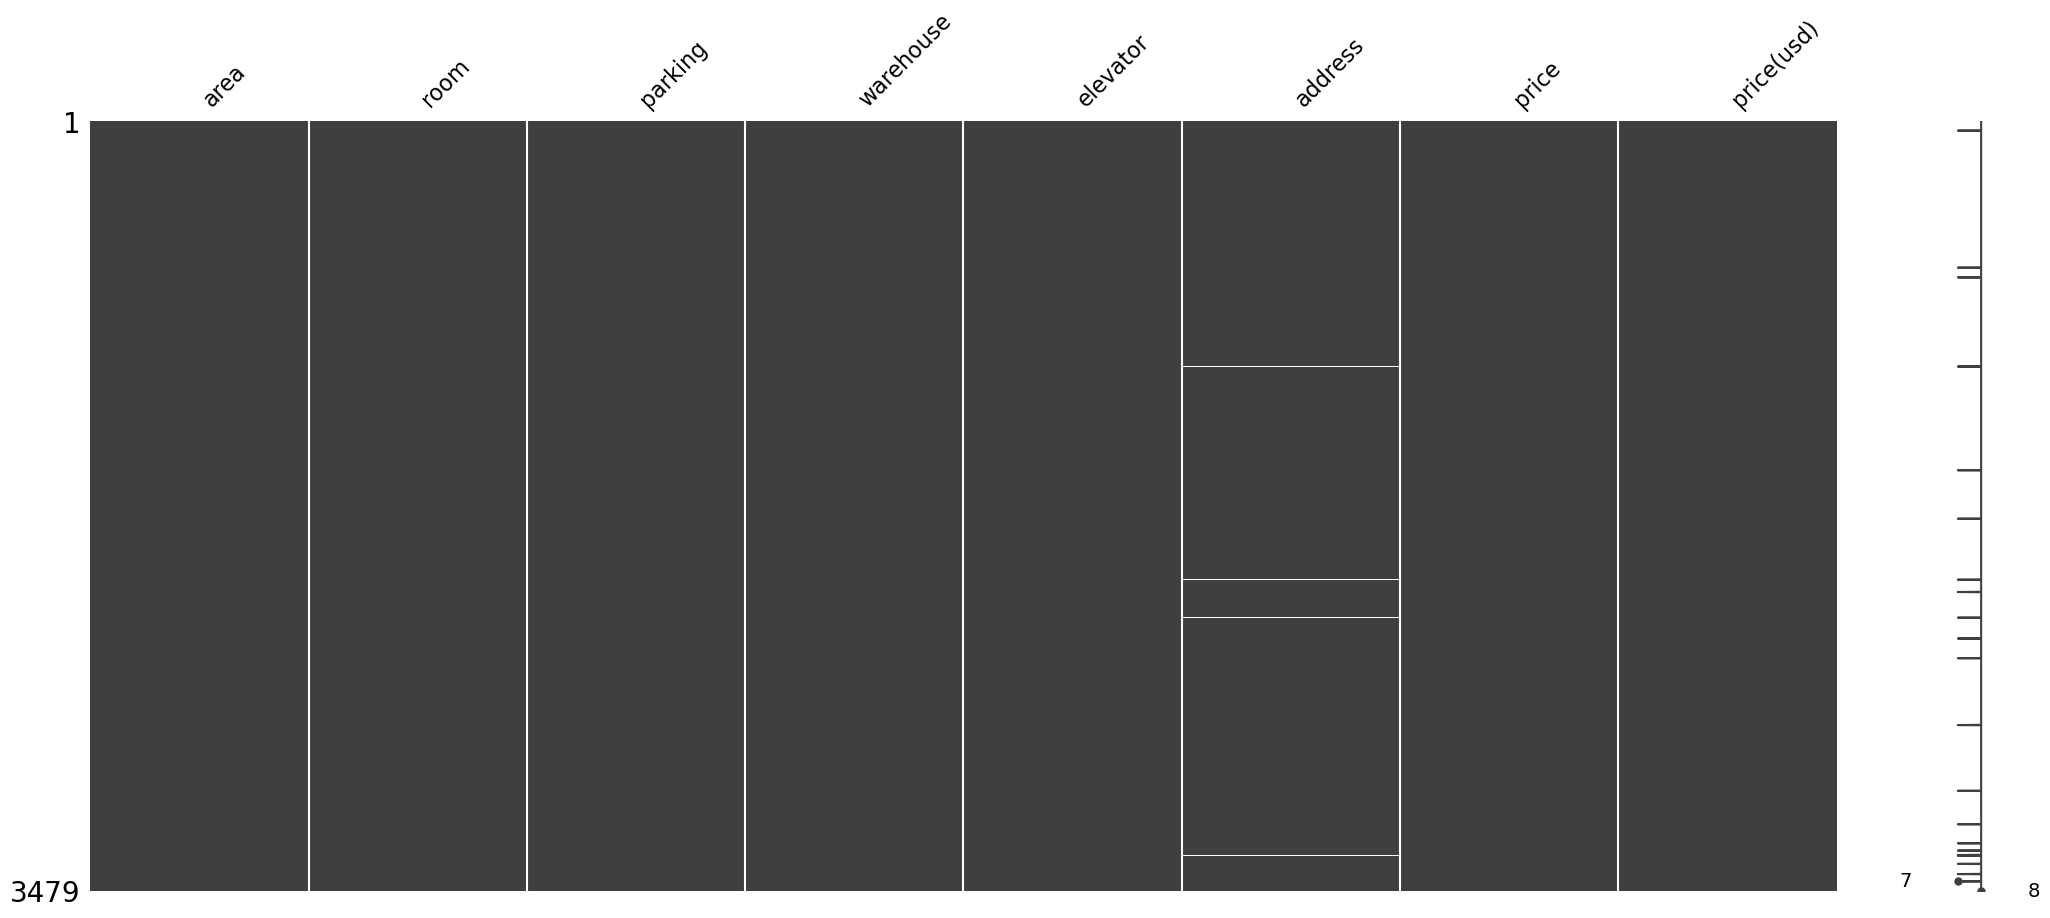

In [99]:
msno.matrix(df);

In [100]:
df.isna().sum()

area           0
room           0
parking        0
warehouse      0
elevator       0
address       23
price          0
price(usd)     0
dtype: int64

In [101]:
df.dropna(subset='address', inplace=True)

In [120]:
df.reset_index(drop=True, inplace=True)

## Create Pairplot

In [103]:
px.scatter_matrix(df.drop(['address'],axis=1),width=800, height=1000)

## Feature Engineering

### Add perSquare Feture

In [127]:
df['perSquare']= df['price'] / df['area']

### Add Latitude, Longtitude
- I found the longtitude and latitude of the districts in Google Maps
- Saved to a json file

In [104]:
def write_json(file_path, data):
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)
        
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [106]:
district = read_json('district.json')

In [125]:
pd.DataFrame(district, index=['latitude', 'latitude']).T.sample(5)

,latitude,latitude
Karimkhan,35.7146,51.4199
Shahrake Shahid Bagheri,35.7600,51.2000
Marzdaran,35.7349,51.3519
Razi,35.6666,51.3957
Afsarieh,35.6539,51.4928


In [108]:
df['latitude'] = df.address.map(lambda x: district[x][0])
df['latitude'] = df.address.map(lambda x: district[x][1])

## EDA

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')
    
    fig.tight_layout(pad=2.0)
    plt.show()

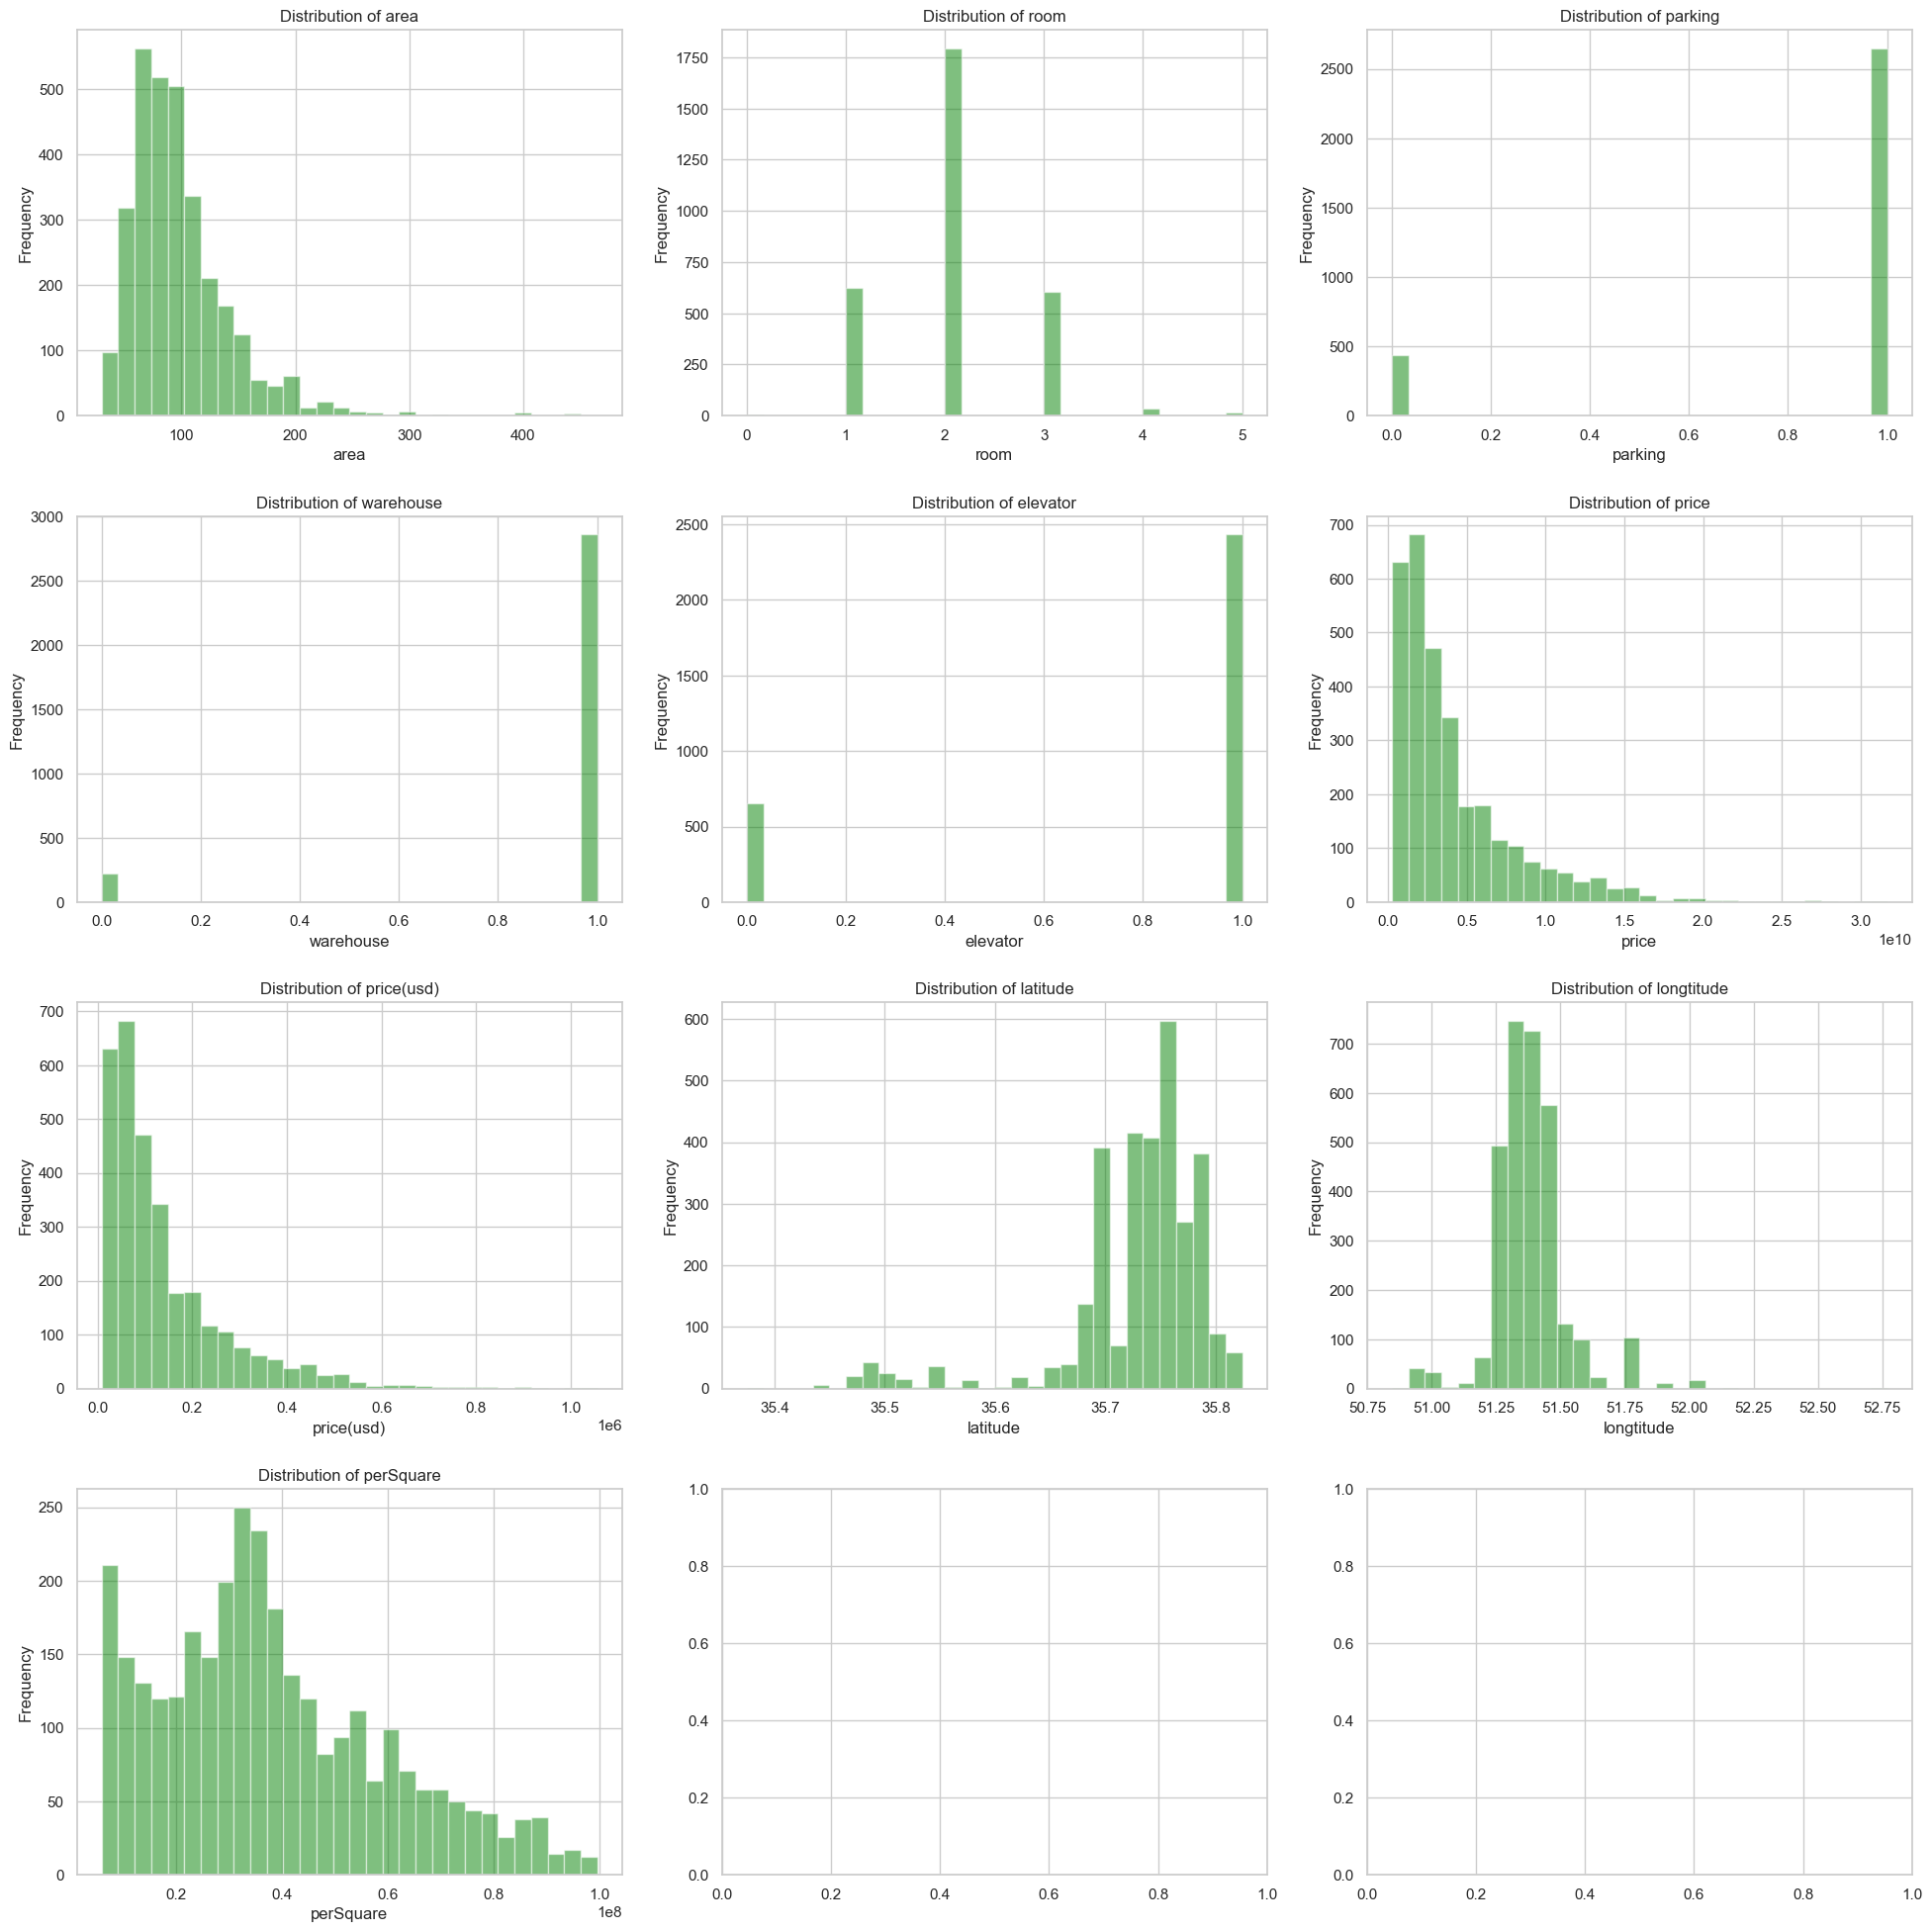

In [159]:
plot_distributions(df.drop('address',1), color='green')

Text(0, 0.5, 'Address')

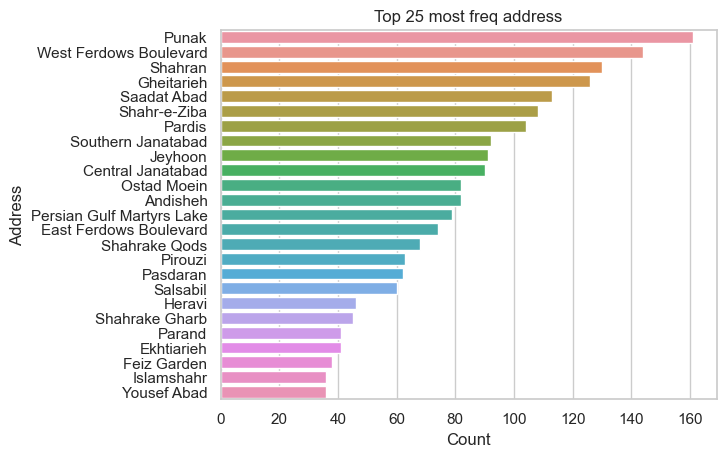

In [182]:
selected_address = df['address'].value_counts()[:25]
sns.barplot(y=selected_address.index, x=selected_address.values);
plt.title('Top 25 most freq address')
plt.xlabel('Count')
plt.ylabel('Address')

## Check Outlier

In [138]:
df.describe()

,area,room,parking,warehouse,elevator,price,price(usd),latitude,longtitude,perSquare
count,3.456000e+03,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000,3456.000000,3.456000e+03
mean,8.802191e+06,2.081308,0.847512,0.914931,0.787326,5.379957e+09,1.793319e+05,35.725082,51.382400,4.120539e+07
std,3.177783e+08,0.759723,0.359546,0.279025,0.409258,8.121729e+09,2.707243e+05,0.076977,0.169099,3.167406e+07
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02,35.305400,50.844400,1.000000e+00
25%,6.900000e+01,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04,35.701000,51.300000,2.000000e+07
50%,9.000000e+01,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04,35.747800,51.370000,3.466544e+07
75%,1.210000e+02,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05,35.770000,51.458100,5.494452e+07
max,1.616000e+10,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06,35.824000,52.768400,4.166667e+08


In [128]:
import numpy as np

def detect_anomalies_z_score(data, threshold=3):
    '''
    Detects anomalies in a 1D array of data using the Z-score method.
    Returns a boolean array indicating which values are anomalies.
    
    Parameters:
        data (array-like): The input data to be analyzed.
        threshold (float): The number of standard deviations from the mean
            above which a value is considered an anomaly. Default is 3.
    
    Returns:
        A boolean array indicating which values are anomalies.
    '''
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

def detect_anomalies_iqr(data, k=1.5):
    '''
    Detects anomalies in a 1D array of data using the IQR method.
    Returns a boolean array indicating which values are anomalies.
    
    Parameters:
        data (array-like): The input data to be analyzed.
        k (float): The multiplier for the IQR above which a value is
            considered an anomaly. Default is 1.5.
    
    Returns:
        A boolean array indicating which values are anomalies.
    '''
    quartile1, quartile3 = np.percentile(data, [25, 75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - k * iqr
    upper_bound = quartile3 + k * iqr
    return (data < lower_bound) | (data > upper_bound)

In [145]:
for col in df.drop(
    columns=['address', 'parking',
             'warehouse', 'elevator',
             'latitude', 'longtitude']):
    
    print(f"--------{col}--------")
    print(f'Number of Outlier (ZScore): {detect_anomalies_z_score(df[col]).sum()}')
    print(f'Number of Outlier (IQR): {detect_anomalies_iqr(df[col]).sum()}')
    print('-'*50)

--------area--------
Number of Outlier (ZScore): 4
Number of Outlier (IQR): 237
--------------------------------------------------
--------room--------
Number of Outlier (ZScore): 33
Number of Outlier (IQR): 1513
--------------------------------------------------
--------price--------
Number of Outlier (ZScore): 79
Number of Outlier (IQR): 310
--------------------------------------------------
--------price(usd)--------
Number of Outlier (ZScore): 79
Number of Outlier (IQR): 310
--------------------------------------------------
--------perSquare--------
Number of Outlier (ZScore): 56
Number of Outlier (IQR): 129
--------------------------------------------------


### Ootlier | Area

#### Detect Anomalies with IQR

In [139]:
df[detect_anomalies_z_score(df.area)].style.background_gradient(subset='area')

,area,room,parking,warehouse,elevator,address,price,price(usd),latitude,longtitude,perSquare
569,3310000000.000000,2,1,1,1,Ostad Moein,3310000000.000000,110333.330000,35.701000,51.344000,1.000000
706,16160000000.000000,3,1,1,1,Pasdaran,16160000000.000000,538666.670000,35.782800,51.467500,1.000000
1598,8400000000.000000,2,1,1,1,Gheitarieh,8700000000.000000,290000.000000,35.792900,51.444700,1.035714
2788,2550000000.000000,2,1,1,1,Central Janatabad,2550000000.000000,85000.000000,35.757800,51.301600,1.000000


#### Detect Anomalies with Z Score

In [140]:
df[detect_anomalies_z_score(df.area)].style.background_gradient(subset='area')

,area,room,parking,warehouse,elevator,address,price,price(usd),latitude,longtitude,perSquare
569,3310000000.000000,2,1,1,1,Ostad Moein,3310000000.000000,110333.330000,35.701000,51.344000,1.000000
706,16160000000.000000,3,1,1,1,Pasdaran,16160000000.000000,538666.670000,35.782800,51.467500,1.000000
1598,8400000000.000000,2,1,1,1,Gheitarieh,8700000000.000000,290000.000000,35.792900,51.444700,1.035714
2788,2550000000.000000,2,1,1,1,Central Janatabad,2550000000.000000,85000.000000,35.757800,51.301600,1.000000


### Ootlier | Price

In [147]:
df[detect_anomalies_z_score(df.price)].style.background_gradient(subset='price')

,area,room,parking,warehouse,elevator,address,price,price(usd),latitude,longtitude,perSquare
200,270.000000,4,1,1,1,Farmanieh,37800000000.000000,1260000.000000,35.800000,51.467000,140000000.000000
329,350.000000,3,1,1,1,Zaferanieh,52500000000.000000,1750000.000000,35.809800,51.410300,150000000.000000
338,335.000000,4,1,1,1,Saadat Abad,33500000000.000000,1116666.670000,35.780000,51.373000,100000000.000000
339,320.000000,4,1,1,1,Saadat Abad,40000000000.000000,1333333.330000,35.780000,51.373000,125000000.000000
348,312.000000,4,1,1,1,Farmanieh,45000000000.000000,1500000.000000,35.800000,51.467000,144230769.230769
412,280.000000,4,1,1,1,Saadat Abad,38500000000.000000,1283333.330000,35.780000,51.373000,137500000.000000
429,400.000000,5,1,1,0,Lavasan,85000000000.000000,2833333.330000,35.818600,51.622600,212500000.000000
430,660.000000,5,1,1,0,Lavasan,55000000000.000000,1833333.330000,35.818600,51.622600,83333333.333333
439,300.000000,3,1,1,1,Niavaran,55500000000.000000,1850000.000000,35.816600,51.470200,185000000.000000
458,245.000000,3,1,1,1,Aqdasieh,36500000000.000000,1216666.670000,35.797000,51.486500,148979591.836735


In [149]:
df = df[df['area'] < 500]
df = df[(df['perSquare'] < np.quantile(df['perSquare'], .95)) & (df['perSquare'] > np.quantile(df['perSquare'], .05))]

In [151]:
df.reset_index(drop=True, inplace=True)

In [152]:
df

,area,room,parking,warehouse,elevator,address,price,price(usd),latitude,longtitude,perSquare
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67,35.7700,51.2800,2.936508e+07
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67,35.7700,51.2800,3.083333e+07
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33,35.7500,51.7700,6.962025e+06
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,35.7600,51.3700,9.500000e+06
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,35.7600,51.3700,5.691057e+07
...,...,...,...,...,...,...,...,...,...,...,...
3080,113.0,3,1,1,1,Ostad Moein,3.170000e+09,105666.67,35.7010,51.3440,2.805310e+07
3081,63.0,1,1,1,0,Feiz Garden,1.890000e+09,63000.00,35.7450,51.3230,3.000000e+07
3082,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,35.7470,51.3000,4.069767e+07
3083,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67,35.8166,51.4702,8.192771e+07


In [156]:
px.imshow(df.corr())

In [186]:
px.scatter(df, x='longtitude', y='latitude', size='price' , 
           hover_name='address' , color=df['room'].astype(str), log_x=True, log_y=True)